## Feature Scaling
- Rescaling
- Standardization

### Rescaling (min-max normalization) 

- for [0,1]
    - X-Xmin/Xmax-Xmin 
- for [a,b]
    - df(X-Xmin) * (b-a)/ Xmax - Xmin

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = np.array([1,3,3,5,6,4,7,5,2])

In [3]:
data

array([1, 3, 3, 5, 6, 4, 7, 5, 2])

In [4]:
dmin = np.min(data)

In [5]:
dmax = np.max(data)

###### For [0,1]

In [6]:
(data - dmin)/(dmax - dmin)

array([0.        , 0.33333333, 0.33333333, 0.66666667, 0.83333333,
       0.5       , 1.        , 0.66666667, 0.16666667])

In [7]:
data = data.reshape(-1,1)   #column as 1 but rows can be n number
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
m.fit(data)

MinMaxScaler()

In [8]:
m.transform(data)

array([[0.        ],
       [0.33333333],
       [0.33333333],
       [0.66666667],
       [0.83333333],
       [0.5       ],
       [1.        ],
       [0.66666667],
       [0.16666667]])

###### For [a,b]

In [9]:
a = 4.6
b = 10.6
#a + (data-dmin)* (b-a)/(dmax - dmin)

a + (data-dmin)* (b-a)/(dmax - dmin)

array([[ 4.6],
       [ 6.6],
       [ 6.6],
       [ 8.6],
       [ 9.6],
       [ 7.6],
       [10.6],
       [ 8.6],
       [ 5.6]])

In [10]:
data = data.reshape(-1,1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler(feature_range = (a,b))

In [12]:
m.fit(data)

MinMaxScaler(feature_range=(4.6, 10.6))

In [13]:
m.transform(data)

array([[ 4.6],
       [ 6.6],
       [ 6.6],
       [ 8.6],
       [ 9.6],
       [ 7.6],
       [10.6],
       [ 8.6],
       [ 5.6]])

In [14]:
import seaborn as sns

In [15]:
iris_df = sns.load_dataset("iris")

In [16]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='sepal_length'>

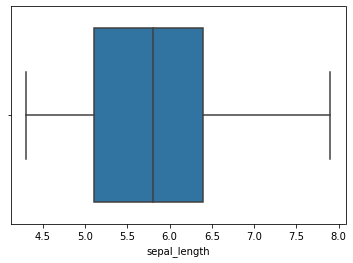

In [17]:
sns.boxplot(x = "sepal_length", data = iris_df)

<AxesSubplot:xlabel='sepal_width'>

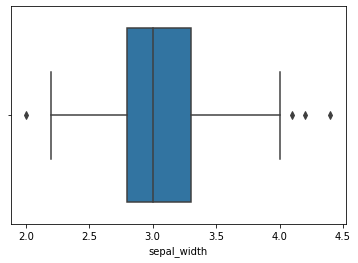

In [18]:
sns.boxplot(x = "sepal_width", data = iris_df)

<AxesSubplot:xlabel='petal_length'>

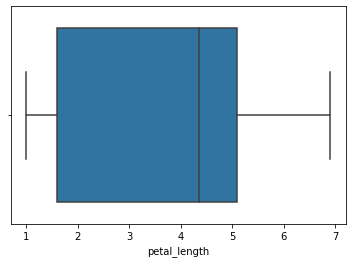

In [19]:
sns.boxplot(x = "petal_length", data = iris_df)

<AxesSubplot:xlabel='petal_width'>

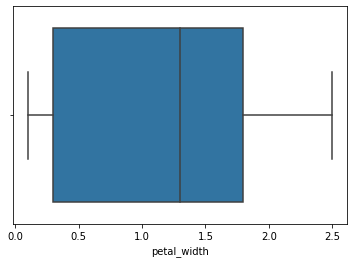

In [20]:
sns.boxplot(x = "petal_width", data = iris_df)

In [21]:
sepallen_min = iris_df["sepal_length"].min()
sepallen_min

4.3

In [22]:
sepallen_max= iris_df["sepal_length"].max()
sepallen_max

7.9

In [23]:
sepalwid_min = iris_df["sepal_width"].min()
sepalwid_min

2.0

In [24]:
sepalwid_max = iris_df["sepal_width"].max()
sepalwid_max

4.4

In [25]:
petallen_min = iris_df["petal_length"].min()
petallen_min

1.0

In [26]:
petallen_max = iris_df["petal_length"].max()
petallen_max

6.9

In [27]:
petalwid_min = iris_df["petal_width"].min()
petalwid_min

0.1

In [28]:
petalwid_max = iris_df["petal_width"].max()
petalwid_max

2.5

### Scaling

In [29]:
iris_df.drop("species", axis = 1, inplace = True)

### Sepal_Length

In [30]:
#Scaling Sepal_Length
a = 5.1
b = 6.5
a + (iris_df - sepallen_min) * (b-a)/(sepallen_max - sepallen_min)

,sepal_length,sepal_width,petal_length,petal_width
0,5.411111,4.788889,3.972222,3.505556
1,5.333333,4.594444,3.972222,3.505556
2,5.255556,4.672222,3.933333,3.505556
3,5.216667,4.633333,4.011111,3.505556
4,5.372222,4.827778,3.972222,3.505556
...,...,...,...,...
145,6.033333,4.594444,5.450000,4.322222
146,5.877778,4.400000,5.372222,4.166667
147,5.955556,4.594444,5.450000,4.205556
148,5.838889,4.750000,5.527778,4.322222


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
m = MinMaxScaler(feature_range=(a,b))

In [33]:
m.fit(iris_df)

MinMaxScaler(feature_range=(5.1, 6.5))

In [34]:
m.transform(iris_df)

array([[5.41111111, 5.975     , 5.19491525, 5.15833333],
       [5.33333333, 5.68333333, 5.19491525, 5.15833333],
       [5.25555556, 5.8       , 5.17118644, 5.15833333],
       [5.21666667, 5.74166667, 5.21864407, 5.15833333],
       [5.37222222, 6.03333333, 5.19491525, 5.15833333],
       [5.52777778, 6.20833333, 5.26610169, 5.275     ],
       [5.21666667, 5.91666667, 5.19491525, 5.21666667],
       [5.37222222, 5.91666667, 5.21864407, 5.15833333],
       [5.13888889, 5.625     , 5.19491525, 5.15833333],
       [5.33333333, 5.74166667, 5.21864407, 5.1       ],
       [5.52777778, 6.09166667, 5.21864407, 5.15833333],
       [5.29444444, 5.91666667, 5.24237288, 5.15833333],
       [5.29444444, 5.68333333, 5.19491525, 5.1       ],
       [5.1       , 5.68333333, 5.12372881, 5.1       ],
       [5.68333333, 6.26666667, 5.14745763, 5.15833333],
       [5.64444444, 6.5       , 5.21864407, 5.275     ],
       [5.52777778, 6.20833333, 5.17118644, 5.275     ],
       [5.41111111, 5.975     ,

### Sepal Width

In [35]:
a=2.8
b=3.4
a + (iris_df - sepalwid_min) * (b-a)/(sepalwid_max - sepalwid_min)
m = MinMaxScaler(feature_range=(a,b))
m.fit(iris_df)
m.transform(iris_df)

array([[2.93333333, 3.175     , 2.84067797, 2.825     ],
       [2.9       , 3.05      , 2.84067797, 2.825     ],
       [2.86666667, 3.1       , 2.83050847, 2.825     ],
       [2.85      , 3.075     , 2.85084746, 2.825     ],
       [2.91666667, 3.2       , 2.84067797, 2.825     ],
       [2.98333333, 3.275     , 2.87118644, 2.875     ],
       [2.85      , 3.15      , 2.84067797, 2.85      ],
       [2.91666667, 3.15      , 2.85084746, 2.825     ],
       [2.81666667, 3.025     , 2.84067797, 2.825     ],
       [2.9       , 3.075     , 2.85084746, 2.8       ],
       [2.98333333, 3.225     , 2.85084746, 2.825     ],
       [2.88333333, 3.15      , 2.86101695, 2.825     ],
       [2.88333333, 3.05      , 2.84067797, 2.8       ],
       [2.8       , 3.05      , 2.81016949, 2.8       ],
       [3.05      , 3.3       , 2.82033898, 2.825     ],
       [3.03333333, 3.4       , 2.85084746, 2.875     ],
       [2.98333333, 3.275     , 2.83050847, 2.875     ],
       [2.93333333, 3.175     ,

### Petal_Length

In [36]:
a=1.8
b=5.4
a + (iris_df - petallen_min) * (b-a)/(petallen_max - petallen_min)
m = MinMaxScaler(feature_range=(a,b))
m.fit(iris_df)
m.transform(iris_df)

array([[2.6       , 4.05      , 2.0440678 , 1.95      ],
       [2.4       , 3.3       , 2.0440678 , 1.95      ],
       [2.2       , 3.6       , 1.98305085, 1.95      ],
       [2.1       , 3.45      , 2.10508475, 1.95      ],
       [2.5       , 4.2       , 2.0440678 , 1.95      ],
       [2.9       , 4.65      , 2.22711864, 2.25      ],
       [2.1       , 3.9       , 2.0440678 , 2.1       ],
       [2.5       , 3.9       , 2.10508475, 1.95      ],
       [1.9       , 3.15      , 2.0440678 , 1.95      ],
       [2.4       , 3.45      , 2.10508475, 1.8       ],
       [2.9       , 4.35      , 2.10508475, 1.95      ],
       [2.3       , 3.9       , 2.16610169, 1.95      ],
       [2.3       , 3.3       , 2.0440678 , 1.8       ],
       [1.8       , 3.3       , 1.86101695, 1.8       ],
       [3.3       , 4.8       , 1.9220339 , 1.95      ],
       [3.2       , 5.4       , 2.10508475, 2.25      ],
       [2.9       , 4.65      , 1.98305085, 2.25      ],
       [2.6       , 4.05      ,

### Petal_Width

In [37]:
a=0.3
b=1.8
a + (iris_df - petalwid_min) * (b-a)/(petalwid_max - petalwid_min)
m = MinMaxScaler(feature_range=(a,b))
m.fit(iris_df)
m.transform(iris_df)

array([[0.63333333, 1.2375    , 0.40169492, 0.3625    ],
       [0.55      , 0.925     , 0.40169492, 0.3625    ],
       [0.46666667, 1.05      , 0.37627119, 0.3625    ],
       [0.425     , 0.9875    , 0.42711864, 0.3625    ],
       [0.59166667, 1.3       , 0.40169492, 0.3625    ],
       [0.75833333, 1.4875    , 0.4779661 , 0.4875    ],
       [0.425     , 1.175     , 0.40169492, 0.425     ],
       [0.59166667, 1.175     , 0.42711864, 0.3625    ],
       [0.34166667, 0.8625    , 0.40169492, 0.3625    ],
       [0.55      , 0.9875    , 0.42711864, 0.3       ],
       [0.75833333, 1.3625    , 0.42711864, 0.3625    ],
       [0.50833333, 1.175     , 0.45254237, 0.3625    ],
       [0.50833333, 0.925     , 0.40169492, 0.3       ],
       [0.3       , 0.925     , 0.32542373, 0.3       ],
       [0.925     , 1.55      , 0.35084746, 0.3625    ],
       [0.88333333, 1.8       , 0.42711864, 0.4875    ],
       [0.75833333, 1.4875    , 0.37627119, 0.4875    ],
       [0.63333333, 1.2375    ,

### fit_transform()

In [39]:
scale_df = m.fit_transform(iris_df)
scale_df

array([[0.63333333, 1.2375    , 0.40169492, 0.3625    ],
       [0.55      , 0.925     , 0.40169492, 0.3625    ],
       [0.46666667, 1.05      , 0.37627119, 0.3625    ],
       [0.425     , 0.9875    , 0.42711864, 0.3625    ],
       [0.59166667, 1.3       , 0.40169492, 0.3625    ],
       [0.75833333, 1.4875    , 0.4779661 , 0.4875    ],
       [0.425     , 1.175     , 0.40169492, 0.425     ],
       [0.59166667, 1.175     , 0.42711864, 0.3625    ],
       [0.34166667, 0.8625    , 0.40169492, 0.3625    ],
       [0.55      , 0.9875    , 0.42711864, 0.3       ],
       [0.75833333, 1.3625    , 0.42711864, 0.3625    ],
       [0.50833333, 1.175     , 0.45254237, 0.3625    ],
       [0.50833333, 0.925     , 0.40169492, 0.3       ],
       [0.3       , 0.925     , 0.32542373, 0.3       ],
       [0.925     , 1.55      , 0.35084746, 0.3625    ],
       [0.88333333, 1.8       , 0.42711864, 0.4875    ],
       [0.75833333, 1.4875    , 0.37627119, 0.4875    ],
       [0.63333333, 1.2375    ,